In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [32]:
# load data
data = pd.read_csv('dataset/dataset.csv' , header=None) 
data = data.dropna()


In [33]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
25,64,80,448,432,0,0,0,1,0,0,1,0,3
26,64,96,448,416,0,0,0,1,0,1,0,0,3
27,64,112,448,400,0,0,0,1,0,1,0,0,3
28,64,128,448,384,0,0,0,1,0,1,0,0,3


In [34]:
data = data.iloc[1:]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
25,64,80,448,432,0,0,0,1,0,0,1,0,3
26,64,96,448,416,0,0,0,1,0,1,0,0,3
27,64,112,448,400,0,0,0,1,0,1,0,0,3
28,64,128,448,384,0,0,0,1,0,1,0,0,3
29,64,144,448,368,0,0,0,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,432,144,80,368,0,0,0,1,0,1,0,0,3
11433,432,160,80,352,0,0,0,1,0,1,0,0,3
11434,432,176,80,336,0,0,0,1,0,1,0,0,3
11435,432,192,80,320,0,0,0,1,0,1,0,0,3


In [35]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [36]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [37]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((4618, 12), (4618,), (1155, 12), (1155,))

In [38]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [39]:
output = model.fit(X_train,Y_train,epochs=108)

Epoch 1/108
145/145 [==============================] - 4s 3ms/step - loss: 1.0396 - accuracy: 0.4307
Epoch 2/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.5199
Epoch 3/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.5188
Epoch 4/108
145/145 [==============================] - 1s 4ms/step - loss: 0.8261 - accuracy: 0.5269
Epoch 5/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8254 - accuracy: 0.5316
Epoch 6/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.5353
Epoch 7/108
145/145 [==============================] - 1s 4ms/step - loss: 0.8212 - accuracy: 0.5325
Epoch 8/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8176 - accuracy: 0.5349
Epoch 9/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8127 - accuracy: 0.5398
Epoch 10/108
145/145 [==============================] - 1s 4ms/step - loss: 0.8097 - accura

In [40]:
loss , accuracy = model.evaluate(X_test,Y_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974


In [41]:
model.save('weights/snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


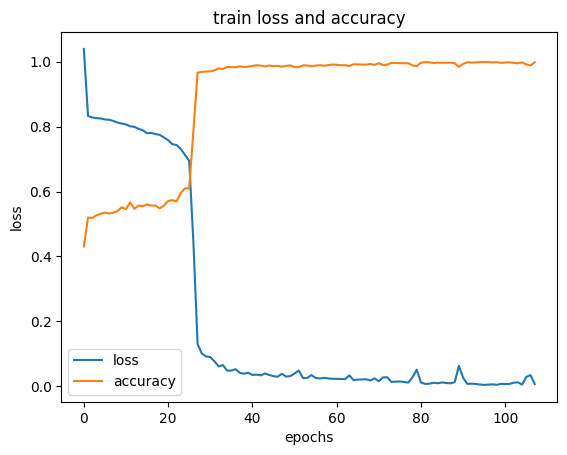

In [42]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()